In [1]:
import numpy as np
import pandas as pd
import sys
import os, sys
import matplotlib.pyplot as plt
import xarray as xr
import xoak
import sklearn

# plot the extent of one of the historical wind netcdfs

In [2]:
output1=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/aws/supplemental_files/AWS/EC-Earth3-Veg/historical/r1i1p1f1/Processed_Runoff_Output/RNFRATE_24hr_r1i1p1f1_1958.nc")
output1

<xarray.Dataset> Size: 176MB
Dimensions:      (day: 365, west_east: 243, south_north: 492)
Coordinates:
  * day          (day) datetime64[ns] 3kB 1958-10-01 1958-10-02 ... 1959-09-30
  * west_east    (west_east) int64 2kB 0 1 2 3 4 5 6 ... 237 238 239 240 241 242
  * south_north  (south_north) int64 4kB 0 1 2 3 4 5 ... 486 487 488 489 490 491
    XLONG        (south_north, west_east) float32 478kB ...
    XTIME        datetime64[ns] 8B ...
    XLAT         (south_north, west_east) float32 478kB ...
Data variables:
    RNFRATE      (day, south_north, west_east) float32 175MB ...

In [3]:
#try out xoak
#example from docs:ds_mesh.xoak.set_index(['lat', 'lon'], 'sklearn_geo_balltree')
#output1.xoak.set_index(['XLAT','XLONG'],'scipy_kdtree') #trty alternate engine used in this example https://pop-tools.readthedocs.io/en/latest/examples/xoak-example.html
output1.xoak.set_index(['XLAT','XLONG'],'sklearn_geo_balltree')
print(output1)

<xarray.Dataset> Size: 176MB
Dimensions:      (day: 365, west_east: 243, south_north: 492)
Coordinates:
  * day          (day) datetime64[ns] 3kB 1958-10-01 1958-10-02 ... 1959-09-30
  * west_east    (west_east) int64 2kB 0 1 2 3 4 5 6 ... 237 238 239 240 241 242
  * south_north  (south_north) int64 4kB 0 1 2 3 4 5 ... 486 487 488 489 490 491
    XLONG        (south_north, west_east) float32 478kB -117.8 -117.8 ... -120.8
    XTIME        datetime64[ns] 8B ...
    XLAT         (south_north, west_east) float32 478kB 29.98 29.99 ... 44.9
Data variables:
    RNFRATE      (day, south_north, west_east) float32 175MB ...


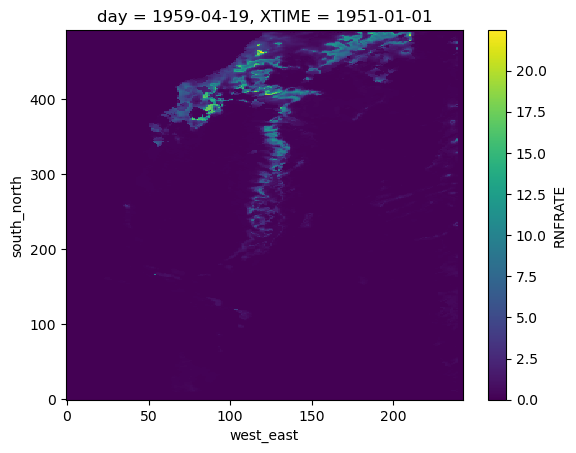

In [4]:
#plot 
output1.RNFRATE[200,:,:].plot()

In [5]:
U10_1988=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/aws/LOCA2/MPI-ESM1-2-HR/ssp370/test/U10_3hr_1988.nc")
U10_1988

<xarray.Dataset> Size: 350MB
Dimensions:  (day: 366, south_north: 492, west_east: 243)
Coordinates:
  * day      (day) datetime64[ns] 3kB 1988-10-01 1988-10-02 ... 1989-10-01
Dimensions without coordinates: south_north, west_east
Data variables:
    U10      (day, south_north, west_east) float64 350MB ...
Attributes:
    Units:    m/s

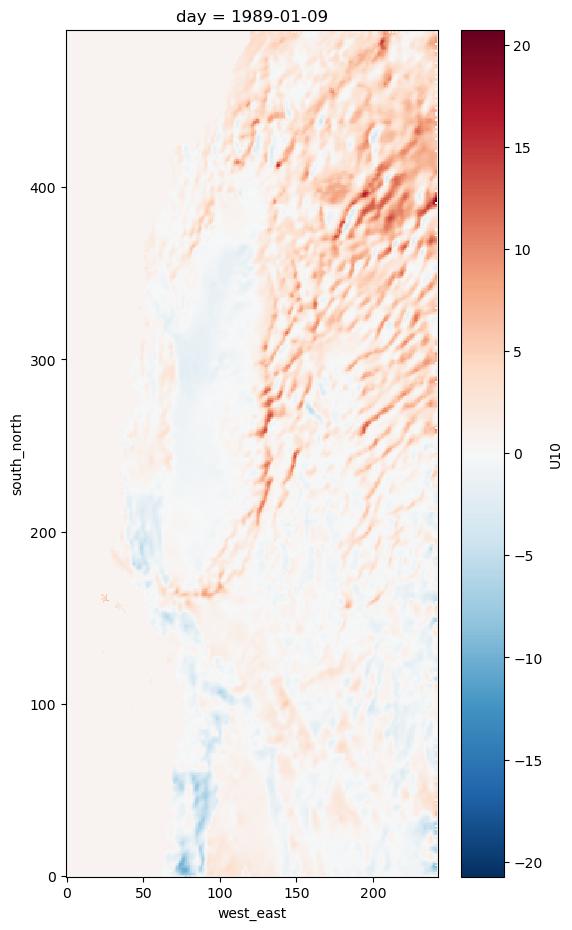

In [6]:
fig = plt.figure(figsize=(6,11))
U10_1988.U10[100,:,:].plot()


In [7]:
# repeat for precip

In [8]:
prec_1988=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/aws/LOCA2/MPI-ESM1-2-HR/ssp370/test/prec_3hr_1988.nc")
prec_1988

<xarray.Dataset> Size: 175MB
Dimensions:  (day: 366, south_north: 492, west_east: 243)
Coordinates:
  * day      (day) datetime64[ns] 3kB 1988-10-01 1988-10-02 ... 1989-10-01
Dimensions without coordinates: south_north, west_east
Data variables:
    prec     (day, south_north, west_east) float32 175MB ...
Attributes:
    Units:    mm/day

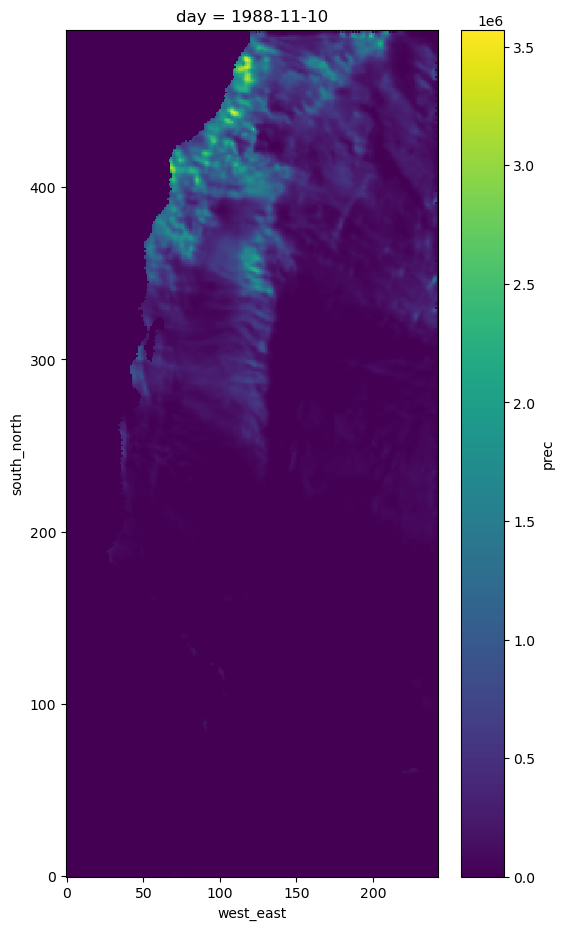

In [9]:
fig2 = plt.figure(figsize=(6,11))
prec_1988.prec[40,:,:].plot()


In [10]:
# repeat for future SLP

In [11]:
slp_2050=xr.open_dataset("/global/scratch/users/jennaisrael/time_varying_data/aws/LOCA2/MPI-ESM1-2-HR/ssp370/gcm-forcing/PSFC_3hr_2050.nc")
slp_2050

<xarray.Dataset> Size: 351MB
Dimensions:  (south_north: 492, west_east: 243, day: 366)
Coordinates:
    XLAT     (south_north, west_east) float32 478kB ...
    XLONG    (south_north, west_east) float32 478kB ...
  * day      (day) datetime64[ns] 3kB 2050-01-01 2050-01-02 ... 2051-01-01
Dimensions without coordinates: south_north, west_east
Data variables:
    PSFC     (day, south_north, west_east) float64 350MB ...
Attributes:
    Units:    Pa

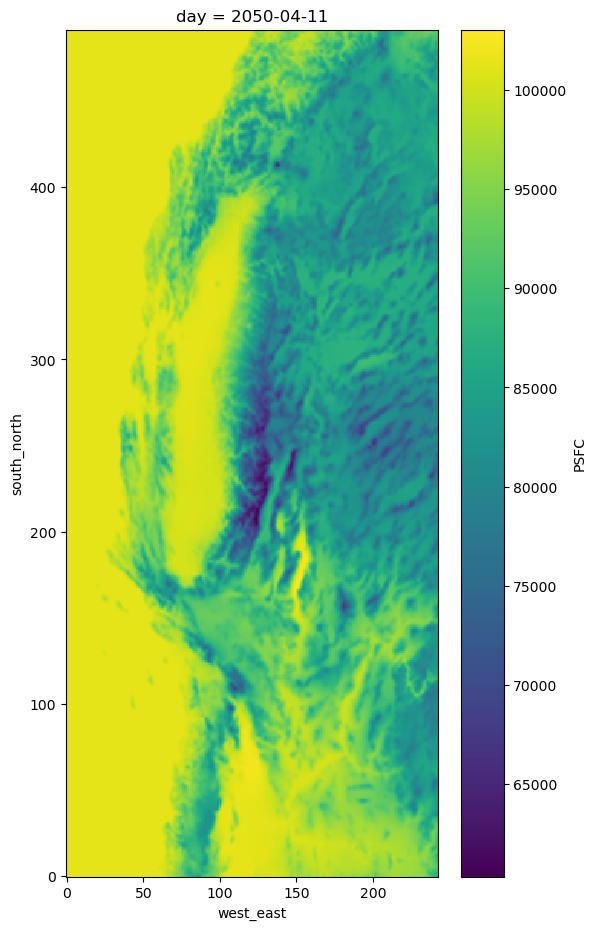

In [14]:
fig3 = plt.figure(figsize=(6,11))
slp_2050.PSFC[100,:,:].plot()